# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# import sys; sys.path.append('./src');
import numpy as np
import plotly_express as px

In [4]:
import pandas as pd
import ipywidgets as widgets
import math
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mean,pstdev

In [5]:
from src.datasets_ex import make_circles_dataframe, make_moons_dataframe, make_exercise_dataframe
from src.cross_validation import cross_validation

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the validation set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [6]:
from sklearn.datasets import make_moons

In [7]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,0.801250,0.355156,A
1,1.090050,-0.437860,B
2,-0.668819,0.970759,A
3,0.355489,-0.269930,B
4,0.603884,0.813333,A


In [8]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [9]:
circles_df = make_circles_dataframe(n_samples=10000, noise_level=0.3)
circles_df.head()

,x,y,label
0,0.216820,-0.942636,A
1,0.126362,-1.071470,A
2,0.300923,0.558503,B
3,0.523483,-1.248539,A
4,-0.001232,1.293745,B


In [10]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [11]:
dataset=make_exercise_dataframe()
dataset.groupby(['dataset_name','noise_level']).apply(lambda grp:grp.head())
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:


dataset_name  noise_level         x         y  \
dataset_name noise_level                                                        
circles      0.0         0           circles          0.0 -0.992115  0.125333   
                         1           circles          0.0 -0.977534 -0.210779   
                         2           circles          0.0 -0.974527 -0.224271   
                         3           circles          0.0  0.826374  0.563122   
                         4           circles          0.0 -0.892712  0.450628   
             0.1         10000       circles          0.1  0.369710  0.821645   
                         10001       circles          0.1 -0.139086  0.671387   
                         10002       circles          0.1  0.097237 -0.994181   
                         10003       circles          0.1 -0.343036 -0.772304   
                         10004       circles          0.1  0.163944 -0.993778   
             0.2         20000       circles          0.2 -0.499605 -0.495574   
                         20001       circles          0.2 -0.907352  0.033243   
                         20002       circles          0.2  0.167547  0.650361   
                         20003       circles          0.2  0.276321 -0.867574   
                         20004       circles          0.2 -0.773811  0.572715   
             0.3         30000       circles          0.3  0.226297  0.834661   
                         30001       circles          0.3  0.771863 -0.225968   
                         30002       circles          0.3  1.074688 -0.753502   
                         30003       circles          0.3  0.238262  0.817948   
                         30004       circles          0.3  0.903076 -0.268317   
             0.4         40000       circles          0.4  1.180734  0.238722   
                         40001       circles          0.4  1.171806  0.446736   
                         40002       circles          0.4  0.405665  1.387618   
                         40003       circles          0.4 -0.191269  1.047963   
                         40004       circles          0.4  0.116923  0.705725   
             0.5         50000       circles          0.5 -0.441183 -0.200908   
                         50001       circles          0.5  0.656421 -1.541065   
                         50002       circles          0.5  0.657791 -0.243355   
                         50003       circles          0.5 -1.079035 -0.757057   
                         50004       circles          0.5 -0.904018 -0.063789   
moons        0.0         60000         moons          0.0  1.910850  0.087263   
                         60001         moons          0.0  1.126293 -0.491993   
                         60002         moons          0.0  1.646444 -0.262961   
                         60003         moons          0.0  0.934375 -0.497844   
                         60004         moons          0.0 -0.294398  0.955683   
             0.1         70000         moons          0.1  0.671836  0.693381   
                         70001         moons          0.1  0.644943  0.751055   
                         70002         moons          0.1  0.622153  0.791920   
                         70003         moons          0.1  0.626323  0.741282   
                         70004         moons          0.1 -1.000602  0.503286   
             0.2         80000         moons          0.2  1.849387  0.334098   
                         80001         moons          0.2  0.618551 -0.688055   
                         80002         moons          0.2  0.262350 -0.191022   
                         80003         moons          0.2 -0.060705  0.875947   
                         80004         moons          0.2  1.068819 -0.468112   
             0.3         90000         moons          0.3  0.155335  0.797420   
                         90001         moons          0.3 -0.419449  1.046880   
                         90002         moons          0.3 -0.09

Your 

You experiment code should look something like that:

In [11]:
# df=circles_df
# index=list(range(0,df.shape[0]))
# test_size=int(0.2*df.shape[0])
# test_index=random.sample(index,test_size)
# train_index=[x for x in index if x not in test_index]

# x_test = df.iloc[test_index,:-1]
# y_test = df.iloc[test_index,-1]

# x_train = df.iloc[train_index,:-1]
# y_train = df.iloc[train_index,-1]


In [12]:
# C=1
# gamma=3

# clf = SVC(kernel='rbf',C=C, gamma=gamma)
# clf.fit(x_train, y_train)
# y_test_pred = clf.predict(x_test)
# accuracy_score(y_test, y_test_pred)



In [13]:
# def cross_validation(X,y,kfold,clf,train_score=False) -> (float,float,float):
#     folds_index=list(range(1,kfold+1))*math.ceil(X.shape[0]/kfold)
#     folds_index=folds_index[0:X.shape[0]]
#     random.shuffle(folds_index)
    
#     acc_fold=[]
#     for k in range(1,kfold+1):
#         x_train_fold = X.iloc[[idx for idx in range(len(folds_index)) if folds_index[idx] != k]]
#         y_train_fold = y.iloc[[idx for idx in range(len(folds_index)) if folds_index[idx] != k]]
#         x_valid_fold = X.iloc[[idx for idx in range(len(folds_index)) if folds_index[idx] == k]]
#         y_valid_fold = y.iloc[[idx for idx in range(len(folds_index)) if folds_index[idx] == k]]
        
#         clf.fit(x_train_fold, y_train_fold)
#         if train_score==True:
#             y_train_pred=clf.predict(x_train_fold)
#             acc_fold.append(accuracy_score(y_train_fold, y_train_pred))
#         if train_score==False:
#             y_valid_pred = clf.predict(x_valid_fold)
#             acc_fold.append(accuracy_score(y_valid_fold, y_valid_pred))
                            
#     return (round(mean(acc_fold),3), round(pstdev(acc_fold),3), round(100*pstdev(acc_fold)/mean(acc_fold),1))


In [21]:
dataset_type = ['circles', 'moons']
k_folds = 10
n_samples = [10,50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg','svm']
regularization = [10**x for x in range (-3,4)]
C_range=[0.1,1,10]
gamma_range= [0.0001,0.001,0.01,0.1,1,2,5,10,25,50,100,250,500,1000]
results=[]

for ds_type in dataset_type:
    print(f'\nWorking on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = dataset.query('dataset_name==@ds_type & noise_level==@nl').head(n)  
            train_index=list(range(ds.shape[0]))
            x_train = ds.iloc[train_index,2:-1]
            y_train = ds.iloc[train_index,-1]
            for clf_type in clf_types:
                print(f'{k_folds}-fold CV for dataset: {ds_type} /w samples: {n:5} and noise level: {nl:3} classifiers: {clf_type}')
                if clf_type =="svm":
                    for C in C_range:
                        for gamma in gamma_range:
                            clf=SVC(kernel='rbf',C=C, gamma=gamma)
                            acc_train,std_train,acc_valid,std_valid=cross_validation(x_train,y_train,k_folds,clf)
                            acc_diff=round(acc_train-acc_valid,3)
                            results.append((ds_type,n,nl,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma))
                if clf_type =="log_reg":
                    for C in regularization:
                        clf = LogisticRegression(penalty='l2', C=C)
                        acc_train,std_train,acc_valid,std_valid=cross_validation(x_train,y_train,k_folds,clf)
                        acc_diff=round(acc_train-acc_valid,3)
                        results.append((ds_type,n,nl,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,0))
                                                                    
df_results=pd.DataFrame(results, columns=['dataset','n_sample','noise_level','clf_type','acc_train','std_train','acc_valid','std_valid','acc_diff','C','gamma'])                    
# df_results.to_csv("./data_res/Modeling_Results.csv", index=False)


Working on circles
10-fold CV for dataset: circles /w samples:    10 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:    10 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:    50 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:    50 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:   100 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:   100 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:  1000 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:  1000 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples: 10000 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples: 10000 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:    10 and noise level: 0.1 classifie

In [12]:
df=pd.read_csv('./data_res/Modeling_Results.csv')

In [13]:
df.shape

(2940, 11)

In [14]:
df.columns

Index(['dataset', 'n_sample', 'noise_level', 'clf_type', 'acc_train',
       'std_train', 'acc_valid', 'std_valid', 'acc_diff', 'C', 'gamma'],
      dtype='object')

In [15]:
df1=df[df.dataset=='circles']
df2=df[df.dataset=='moons']
print(f'df1 Shape : {df1.shape}')
print(f'df2 Shape : {df2.shape}')

df1 Shape : (1470, 11)
df2 Shape : (1470, 11)


#### <b>(1) Best SVM classifier params for each dataset w/ 10k samples</b>

SVM Clasifier hyper parms w/ the highest accuracy on validation test for each dataset for sample size of 10K and for each noise level

##### Circles dataset

Best SVM hyper params combination to get <b>maximum predicted accuracy</b> on validation set per each noise level.<br>


In [16]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
            208   circles     10000          0.0      svm      1.000   
            209   circles     10000          0.0      svm      1.000   
            210   circles     10000          0.0      svm      1.000   
            211   circles     10000          0.0      svm      1.000   
            212   circles     10000          0.0      svm      1.000   
            213   circles     10000          0.0      svm      1.000   
            214   circles     10000          0.0      svm      1.000   
            215   circles     10000          0.0      svm      1.000   
            216   circles     10000          0.0      svm      1.000   
            220   circles     10000          0.0      svm      1.000   
            221   circles     10000          0.0      svm      1.000   
            222   circles     10000          0.0      svm      1.000   
            223   circles     10000          0.0      svm      1.000   
            224   circles     10000          0.0      svm      1.000   
            225   circles     10000          0.0      svm      1.000   
            226   circles     10000          0.0      svm      1.000   
            227   circles     10000          0.0      svm      1.000   
            228   circles     10000          0.0      svm      1.000   
            229   circles     10000          0.0      svm      1.000   
            230   circles     10000          0.0      svm      1.000   
            233   circles     10000          0.0      svm      1.000   
            234   circles     10000          0.0      svm      1.000   
            235   circles     10000          0.0      svm      1.000   
            236   circles     10000          0.0      svm      1.000   
            237   circles     10000          0.0      svm      1.000   
            238   circles     10000          0.0      svm      1.000   
            239   circles     10000          0.0      svm      1.000   
            240   circles     10000          0.0      svm      1.000   
            241   circles     10000          0.0      svm      1.000   
            242   circles     10000          0.0      svm      1.000   
            243   circles     10000          0.0      svm      1.000   
            244   circles     10000          0.0      svm      1.000   
0.1         468   circles     10000          0.1      svm      0.845   
            469   circles     10000          0.1      svm      0.845   
            481   circles     10000          0.1      svm      0.844   
0.2         711   circles     10000          0.2      svm      0.691   
0.3         943   circles     10000          0.3      svm      0.637   
0.4         1216  circles     10000          0.4      svm      0.593   
0.5         1447  circles     10000          0.5      svm      0.583   
            1461  circles     10000          0.5      svm      0.583   

                  std_train  acc_valid  std_valid  acc_diff     C    gamma  
noise_level                                                                 
0.0         207       0.000      1.000      0.000     0.000   0.1     1.00  
            208       0.000      1.000      0.000     0.000   0.1     2.00  
            209       0.000      1.000      0.000     0.000   0.1     5.00  
            210       0.000      1.000      0.000     0.000   0.1    10.00  
            211       0.000      1.000      0.000     0.000   0.1    25.00  
            212       0.000      1.000      0.000     0.000   0.1    50.00  
            213       0.000      1.000      0.000     0.000   0.1   100.00  
            214       0.000      1.000      0.000     0.000   0.1   250.00  
            215       0.000      1.000      0.000     0.000   0.1   500.00  
            216       0.000      1.000      0.000     0.000   0.1  1000.00

 * Filler out the models w/ the lowest standard deviation for final pick

In [17]:
# df.loc[df.query("dataset=='circles' & clf_type=='svm' & n_sample==10000").groupby('noise_level').acc_valid.idxmax()]
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))

,,dataset,n_sample,noise_level,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma
noise_level,,,,,,,,,,,,
0.0,207,circles,10000,0.0,svm,1.000,0.000,1.000,0.000,0.000,0.1,1.0
0.1,481,circles,10000,0.1,svm,0.844,0.001,0.844,0.006,0.000,10.0,2.0
0.2,711,circles,10000,0.2,svm,0.691,0.002,0.690,0.020,0.001,1.0,1.0
0.3,943,circles,10000,0.3,svm,0.637,0.001,0.636,0.013,0.001,0.1,2.0
0.4,1216,circles,10000,0.4,svm,0.593,0.002,0.592,0.013,0.001,10.0,2.0
0.5,1461,circles,10000,0.5,svm,0.583,0.002,0.578,0.015,0.005,10.0,2.0


##### Moons dataset

Best SVM hyper params combination to get <b>maximum predicted accuracy</b> on validation set per each noise level.<br>


In [18]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
            1678   moons     10000          0.0      svm      1.000   
            1679   moons     10000          0.0      svm      1.000   
            1680   moons     10000          0.0      svm      1.000   
            1681   moons     10000          0.0      svm      1.000   
            1682   moons     10000          0.0      svm      1.000   
            1683   moons     10000          0.0      svm      1.000   
            1684   moons     10000          0.0      svm      1.000   
            1685   moons     10000          0.0      svm      1.000   
            1686   moons     10000          0.0      svm      1.000   
            1690   moons     10000          0.0      svm      1.000   
            1691   moons     10000          0.0      svm      1.000   
            1692   moons     10000          0.0      svm      1.000   
            1693   moons     10000          0.0      svm      1.000   
            1694   moons     10000          0.0      svm      1.000   
            1695   moons     10000          0.0      svm      1.000   
            1696   moons     10000          0.0      svm      1.000   
            1697   moons     10000          0.0      svm      1.000   
            1698   moons     10000          0.0      svm      1.000   
            1699   moons     10000          0.0      svm      1.000   
            1700   moons     10000          0.0      svm      1.000   
            1704   moons     10000          0.0      svm      1.000   
            1705   moons     10000          0.0      svm      1.000   
            1706   moons     10000          0.0      svm      1.000   
            1707   moons     10000          0.0      svm      1.000   
            1708   moons     10000          0.0      svm      1.000   
            1709   moons     10000          0.0      svm      1.000   
            1710   moons     10000          0.0      svm      1.000   
            1711   moons     10000          0.0      svm      1.000   
            1712   moons     10000          0.0      svm      1.000   
            1713   moons     10000          0.0      svm      1.000   
            1714   moons     10000          0.0      svm      1.000   
0.1         1925   moons     10000          0.1      svm      1.000   
            1926   moons     10000          0.1      svm      1.000   
            1937   moons     10000          0.1      svm      1.000   
            1951   moons     10000          0.1      svm      1.000   
            1952   moons     10000          0.1      svm      1.000   
0.2         2195   moons     10000          0.2      svm      0.972   
0.3         2415   moons     10000          0.3      svm      0.915   
            2430   moons     10000          0.3      svm      0.917   
            2432   moons     10000          0.3      svm      0.921   
            2442   moons     10000          0.3      svm      0.915   
0.4         2661   moons     10000          0.4      svm      0.864   
            2662   moons     10000          0.4      svm      0.865   
            2674   moons     10000          0.4      svm      0.864   
            2676   moons     10000          0.4      svm      0.867   
            2687   moons     10000          0.4      svm      0.864   
            2688   moons     10000          0.4      svm      0.865   
0.5         2906   moons     10000          0.5      svm      0.828   
            2919   moons     10000          0.5      svm      0.828   
            2932   moons     10000          0.5      svm      0.827   

                  std_train  acc_valid  std_valid  acc_diff     C   gamma  
noise_level                                                                
0.0         1677      0.000      1.000      0.000     0.000   0.1     1.0  
            1678      0.0

 * Filler out the models w/ the lowest standard deviation for final pick

In [19]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))

,,dataset,n_sample,noise_level,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma
noise_level,,,,,,,,,,,,
0.0,1677,moons,10000,0.0,svm,1.000,0.000,1.000,0.000,0.000,0.1,1.0
0.1,1951,moons,10000,0.1,svm,1.000,0.000,1.000,0.000,0.000,10.0,2.0
0.2,2195,moons,10000,0.2,svm,0.972,0.001,0.972,0.004,0.000,10.0,1.0
0.3,2432,moons,10000,0.3,svm,0.921,0.001,0.915,0.006,0.006,1.0,100.0
0.4,2676,moons,10000,0.4,svm,0.867,0.001,0.863,0.007,0.004,1.0,50.0
0.5,2919,moons,10000,0.5,svm,0.828,0.001,0.825,0.010,0.003,1.0,10.0


Tuned SVM hyper params (C and gamma) that <b>maximize the predicted accuracy</b> on the validation set and <b>minimize the standard deviation</b> of that accuracy achieved for each noise level<br>
With the <b>noise level increases</b> predicted <b>accuracy</b> score on the validation set <b>decreases</b>.<br>
The <b>standard deviation</b> of the accuracy score tends to <b>increase</b> w/ higher noise level.</b><br>

When the classifiier tune for <b>maximum accuracy</b> the model has <b>higher variance and lower bais</b>

Circels : noise level [0-0.5] : Accuracy range [0.578-1]  std range [0-0.02]<br>
Moons   : noise level [0-0.5] : Acuuracy range [0.825-1]  std range [0-0.01]

#### <b>(2) Most stable SVM classifier params for each dataset w/ 10k samples</b>

##### Circels dataset

Best SVM hyper params combination to get <b>minimum standard deviation</b> of predicted accuracy on validation set per each noise level.<br>


In [20]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
            208   circles     10000          0.0      svm      1.000   
            209   circles     10000          0.0      svm      1.000   
            210   circles     10000          0.0      svm      1.000   
            211   circles     10000          0.0      svm      1.000   
            212   circles     10000          0.0      svm      1.000   
            213   circles     10000          0.0      svm      1.000   
            214   circles     10000          0.0      svm      1.000   
            215   circles     10000          0.0      svm      1.000   
            216   circles     10000          0.0      svm      1.000   
            220   circles     10000          0.0      svm      1.000   
            221   circles     10000          0.0      svm      1.000   
            222   circles     10000          0.0      svm      1.000   
            223   circles     10000          0.0      svm      1.000   
            224   circles     10000          0.0      svm      1.000   
            225   circles     10000          0.0      svm      1.000   
            226   circles     10000          0.0      svm      1.000   
            227   circles     10000          0.0      svm      1.000   
            228   circles     10000          0.0      svm      1.000   
            229   circles     10000          0.0      svm      1.000   
            230   circles     10000          0.0      svm      1.000   
            233   circles     10000          0.0      svm      1.000   
            234   circles     10000          0.0      svm      1.000   
            235   circles     10000          0.0      svm      1.000   
            236   circles     10000          0.0      svm      1.000   
            237   circles     10000          0.0      svm      1.000   
            238   circles     10000          0.0      svm      1.000   
            239   circles     10000          0.0      svm      1.000   
            240   circles     10000          0.0      svm      1.000   
            241   circles     10000          0.0      svm      1.000   
            242   circles     10000          0.0      svm      1.000   
            243   circles     10000          0.0      svm      1.000   
            244   circles     10000          0.0      svm      1.000   
0.1         450   circles     10000          0.1      svm      0.501   
            475   circles     10000          0.1      svm      0.872   
            481   circles     10000          0.1      svm      0.844   
0.2         694   circles     10000          0.2      svm      0.501   
0.3         951   circles     10000          0.3      svm      0.507   
            977   circles     10000          0.3      svm      0.760   
0.4         1185  circles     10000          0.4      svm      0.501   
0.5         1432  circles     10000          0.5      svm      0.578   
            1433  circles     10000          0.5      svm      0.581   
            1442  circles     10000          0.5      svm      0.501   

                  std_train  acc_valid  std_valid  acc_diff     C      gamma  
noise_level                                                                   
0.0         207       0.000      1.000      0.000     0.000   0.1     1.0000  
            208       0.000      1.000      0.000     0.000   0.1     2.0000  
            209       0.000      1.000      0.000     0.000   0.1     5.0000  
            210       0.000      1.000      0.000     0.000   0.1    10.0000  
            211       0.000      1.000      0.000     0.000   0.1    25.0000  
            212       0.000      1.000      0.000     0.000   0.1    50.0000  
            213       0.000      1.000      0.000     0.000   0.1   100.0000  
            214       0.000      1.000      0.000     0.000   0.1 

 * Filler out the models w/ the highest predicted accuracy on validation set  for final pick

In [21]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['std_valid','acc_valid'],ascending=[True,False]).head(1))

,,dataset,n_sample,noise_level,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma
noise_level,,,,,,,,,,,,
0.0,207,circles,10000,0.0,svm,1.000,0.000,1.000,0.000,0.000,0.1,1.000
0.1,481,circles,10000,0.1,svm,0.844,0.001,0.844,0.006,0.000,10.0,2.000
0.2,694,circles,10000,0.2,svm,0.501,0.001,0.492,0.005,0.009,0.1,0.001
0.3,977,circles,10000,0.3,svm,0.760,0.002,0.576,0.005,0.184,10.0,250.000
0.4,1185,circles,10000,0.4,svm,0.501,0.000,0.490,0.004,0.011,0.1,0.010
0.5,1432,circles,10000,0.5,svm,0.578,0.001,0.577,0.006,0.001,0.1,1.000


##### Moons dataset

Best SVM hyper params combination to get <b>minimum standard deviation</b> of predicted accuracy on validation set per each noise level.<br>


In [22]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
            1678   moons     10000          0.0      svm      1.000   
            1679   moons     10000          0.0      svm      1.000   
            1680   moons     10000          0.0      svm      1.000   
            1681   moons     10000          0.0      svm      1.000   
            1682   moons     10000          0.0      svm      1.000   
            1683   moons     10000          0.0      svm      1.000   
            1684   moons     10000          0.0      svm      1.000   
            1685   moons     10000          0.0      svm      1.000   
            1686   moons     10000          0.0      svm      1.000   
            1690   moons     10000          0.0      svm      1.000   
            1691   moons     10000          0.0      svm      1.000   
            1692   moons     10000          0.0      svm      1.000   
            1693   moons     10000          0.0      svm      1.000   
            1694   moons     10000          0.0      svm      1.000   
            1695   moons     10000          0.0      svm      1.000   
            1696   moons     10000          0.0      svm      1.000   
            1697   moons     10000          0.0      svm      1.000   
            1698   moons     10000          0.0      svm      1.000   
            1699   moons     10000          0.0      svm      1.000   
            1700   moons     10000          0.0      svm      1.000   
            1704   moons     10000          0.0      svm      1.000   
            1705   moons     10000          0.0      svm      1.000   
            1706   moons     10000          0.0      svm      1.000   
            1707   moons     10000          0.0      svm      1.000   
            1708   moons     10000          0.0      svm      1.000   
            1709   moons     10000          0.0      svm      1.000   
            1710   moons     10000          0.0      svm      1.000   
            1711   moons     10000          0.0      svm      1.000   
            1712   moons     10000          0.0      svm      1.000   
            1713   moons     10000          0.0      svm      1.000   
            1714   moons     10000          0.0      svm      1.000   
0.1         1928   moons     10000          0.1      svm      1.000   
            1951   moons     10000          0.1      svm      1.000   
            1953   moons     10000          0.1      svm      1.000   
0.2         2184   moons     10000          0.2      svm      0.971   
0.3         2416   moons     10000          0.3      svm      0.916   
            2448   moons     10000          0.3      svm      0.949   
0.4         2678   moons     10000          0.4      svm      0.877   
0.5         2898   moons     10000          0.5      svm      0.501   
            2912   moons     10000          0.5      svm      0.786   
            2935   moons     10000          0.5      svm      0.836   

                  std_train  acc_valid  std_valid  acc_diff     C      gamma  
noise_level                                                                   
0.0         1677      0.000      1.000      0.000     0.000   0.1     1.0000  
            1678      0.000      1.000      0.000     0.000   0.1     2.0000  
            1679      0.000      1.000      0.000     0.000   0.1     5.0000  
            1680      0.000      1.000      0.000     0.000   0.1    10.0000  
            1681      0.000      1.000      0.000     0.000   0.1    25.0000  
            1682      0.000      1.000      0.000     0.000   0.1    50.0000  
            1683      0.000      1.000      0.000     0.000   0.1   100.0000  
            1684      0.000      1.000      0.000     0.000   0.1   250.0000  
            1685      0.000      1.000      0.000     0.000   0.1   500.0000  
            1686      0

 * Filler out the models w/ the highest predicted accuracy on validation set  for final pick

In [23]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['std_valid','acc_valid'],ascending=[True,False]).head(1))

,,dataset,n_sample,noise_level,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma
noise_level,,,,,,,,,,,,
0.0,1677,moons,10000,0.0,svm,1.000,0.000,1.000,0.000,0.000,0.1,1.0
0.1,1951,moons,10000,0.1,svm,1.000,0.000,1.000,0.000,0.000,10.0,2.0
0.2,2184,moons,10000,0.2,svm,0.971,0.000,0.970,0.003,0.001,1.0,10.0
0.3,2416,moons,10000,0.3,svm,0.916,0.001,0.914,0.005,0.002,0.1,25.0
0.4,2678,moons,10000,0.4,svm,0.877,0.001,0.852,0.003,0.025,1.0,250.0
0.5,2935,moons,10000,0.5,svm,0.836,0.001,0.816,0.007,0.020,10.0,50.0


Tuned SVM hyper params (C and gamma) that <b>minimize the standard deviation</b> of the predicted accuracy</b> on the validation set and <b>maximize</b> of that accuracy achieved for each noise level <br>

When the classifiier tune for <b>minimum standard deviation</b> of the accuracy the model has <b>higher bias and low variance</b>

Circels : noise level [0-0.5] : Accuracy range [0.490-1]  std range [0-0.006]<br>
Moons   : noise level [0-0.5] : Acuuracy range [0.816-1]  std range [0-0.007]

Does regularization help for linear models? consider different datasets sizes. 

#### <b>(3) Regularization impact on linear model<b>

##### Circels dataset

In [72]:
df1_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).reset_index()
df1_lm.sample(10)

,noise_level,n_sample,C,level_3,acc_valid
129,0.3,1000,1.000,885,0.538
147,0.4,50,0.001,1029,0.320
198,0.5,1000,0.100,1374,0.528
19,0.0,100,100.000,103,0.410
184,0.5,50,0.100,1276,0.440
99,0.2,10000,0.010,687,0.469
102,0.2,10000,10.000,690,0.492
42,0.1,50,0.001,294,0.300
25,0.0,1000,10.000,151,0.441
14,0.0,100,0.001,98,0.470


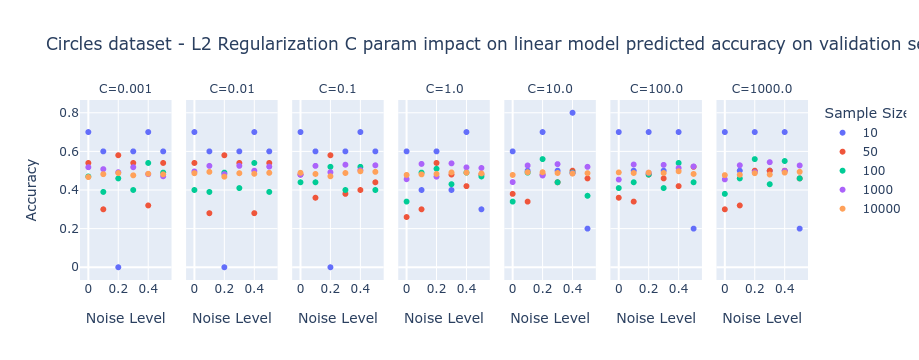

In [65]:
df1_lm.n_sample = df1_lm.n_sample.astype(str)
fig=px.scatter(df1_lm,x='noise_level',y='acc_valid',
               labels={'noise_level': 'Noise Level', 'acc_valid':'Accuracy','n_sample':'Sample Size'},
               color='n_sample',hover_data=['n_sample'],facet_col='C',
               title='Circles dataset - L2 Regularization C param impact on linear model predicted accuracy on validation set')
fig.show()
# fig.update(layout_coloraxis_showscale=False)

In general and for the Circles dataset,  L2 regularization C param for the linear model doesn't help improve model accuracy for all sample sizes regardless of noise levels.<br>
Accuracy score achieved with the linear model is around 50% for all C param values.<br>
The linear classifiers model can not sperate well the two class come from the circles.

##### Moons dataset

In [71]:
df2_lm=df2.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).reset_index() 
df2_lm.sample(10)

,noise_level,n_sample,C,level_3,acc_valid
184,0.5,50,0.100,2746,0.700
75,0.2,10,100.000,1965,0.800
191,0.5,100,0.100,2795,0.790
181,0.5,10,1000.000,2701,0.700
89,0.2,100,100.000,2063,0.830
33,0.0,10000,100.000,1671,0.894
9,0.0,50,0.100,1521,0.660
183,0.5,50,0.010,2745,0.600
101,0.2,10000,1.000,2159,0.872
14,0.0,100,0.001,1568,0.550


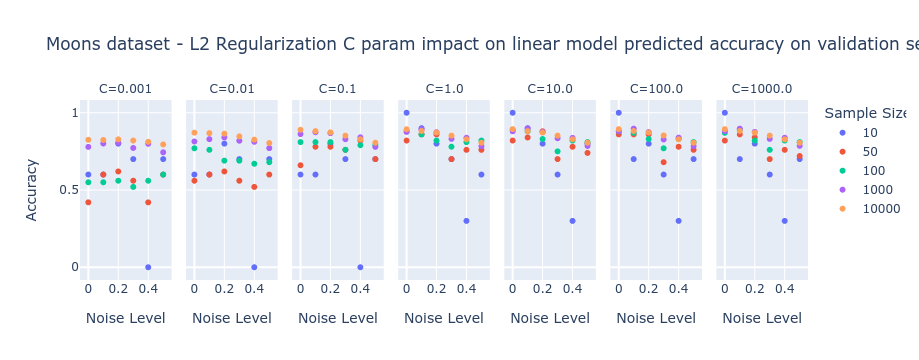

In [60]:
df2_lm.n_sample = df2_lm_res.n_sample.astype(str)
fig=px.scatter(df2_lm,x='noise_level',y='acc_valid',
               labels={'noise_level': 'Noise Level', 'acc_valid':'Accuracy','n_sample':'Sample Size'},
               color='n_sample',hover_data=['n_sample'],facet_col='C',
               title='Moons dataset - L2 Regularization C param impact on linear model predicted accuracy on validation set')
fig.show()

Also for the moons dataset the L2 C param for the linear classifier does not help to improve the model accuracy.<br>
Similar results for all C values.<br>
On the moons dataset the linear classifier achieving better accuracy results relative to the results on the circles dataset

* For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

#### <b>(4) Sample size impact on the train-test accuracy difference</b>

##### Linear Classifier

* Circles dataset

In [97]:
df1_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df1_lm.sample(10)

,noise_level,C,n_sample,level_3,acc_diff
146,0.4,0.01,50,1030,0.249
81,0.2,0.10,50,541,0.000
25,0.0,100.00,10,5,0.089
127,0.3,10.00,100,837,0.097
186,0.5,0.10,50,1276,0.144
22,0.0,10.00,100,102,0.173
40,0.1,0.01,10,246,0.000
21,0.0,10.00,50,53,0.162
24,0.0,10.00,10000,200,0.024
134,0.3,100.00,10000,936,0.012


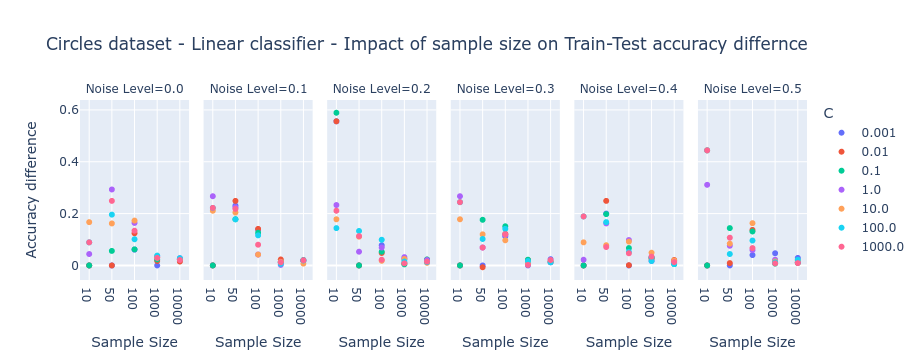

In [145]:
df1_lm.C = df1_lm.C.astype(str)
df1_lm.n_sample = df1_lm.n_sample.astype(str)

fig=px.scatter(df1_lm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='C',hover_data=['n_sample'],facet_col='noise_level',
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce')
fig.show()

From chart we can see that tarin-test <b>accuracy difference decreases as sample size increases</b> for all noize levels and for all L2 regularization C param.<br>
For further analysis, we can calculate mean and standard deviation for Tarin-Test accuracy differnce across L2 C values in order to establish the argument.

In [117]:
df1_lm_stat=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df1_lm_stat

,noise_level,n_sample,mean,std
0,0.0,10,0.055571,0.063311
1,0.0,50,0.136571,0.119082
2,0.0,100,0.117000,0.044907
3,0.0,1000,0.024571,0.012869
4,0.0,10000,0.023000,0.004546
5,0.1,10,0.131714,0.124457
6,0.1,50,0.211714,0.026725
7,0.1,100,0.097857,0.043114
8,0.1,1000,0.011714,0.006601
9,0.1,10000,0.017571,0.004756


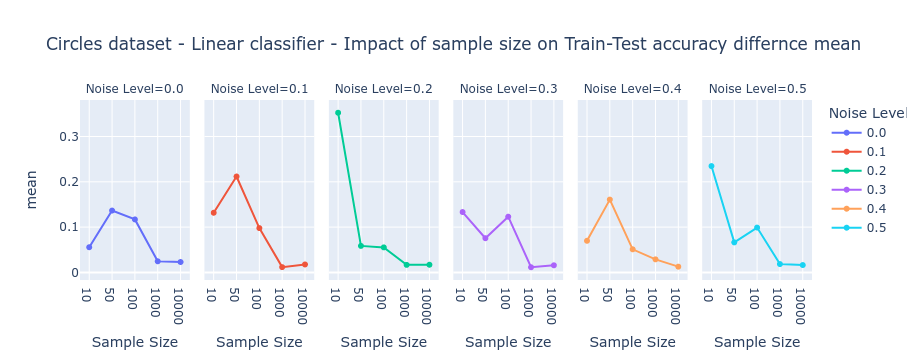

In [144]:
df1_lm_stat.noise_level = df1_lm_stat.noise_level.astype(str)
df1_lm_stat.n_sample = df1_lm_stat.n_sample.astype(str)

fig=px.line(df1_lm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['mean'],facet_col='noise_level',markers=True,
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

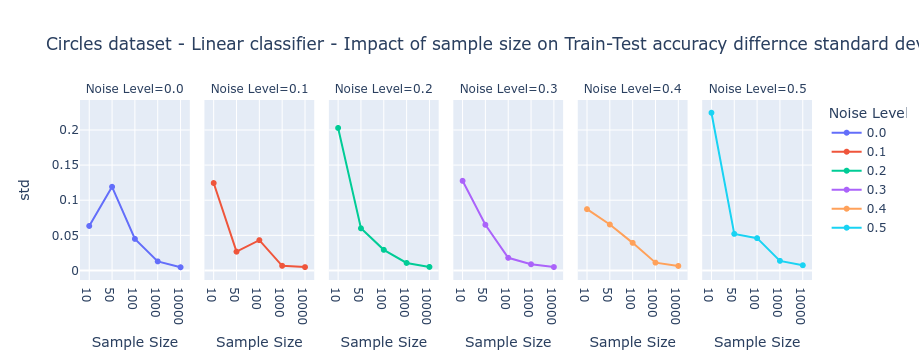

In [143]:
df1_lm_stat.noise_level = df1_lm_stat.noise_level.astype(str)
df1_lm_stat.n_sample = df1_lm_stat.n_sample.astype(str)

fig=px.line(df1_lm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['std'],facet_col='noise_level',markers=True,
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce standard deviation ')
fig.show()

As expected, the mean and the standard deviation of Train-Test accuracy difference for different L2 C values,  drops as sample size increase, for all noise levels.

* Moons dataset

In [130]:
df2_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df2_lm.sample(10)

,noise_level,C,n_sample,level_3,acc_diff
13,0.0,0.100,1000,149,0.023
67,0.1,1000.000,100,349,0.080
22,0.0,10.000,100,102,0.173
168,0.4,100.000,1000,1132,0.017
25,0.0,100.000,10,5,0.089
166,0.4,100.000,50,1034,0.167
177,0.5,0.001,100,1323,0.040
127,0.3,10.000,100,837,0.097
121,0.3,1.000,50,787,0.069
154,0.4,0.100,10000,1178,0.005


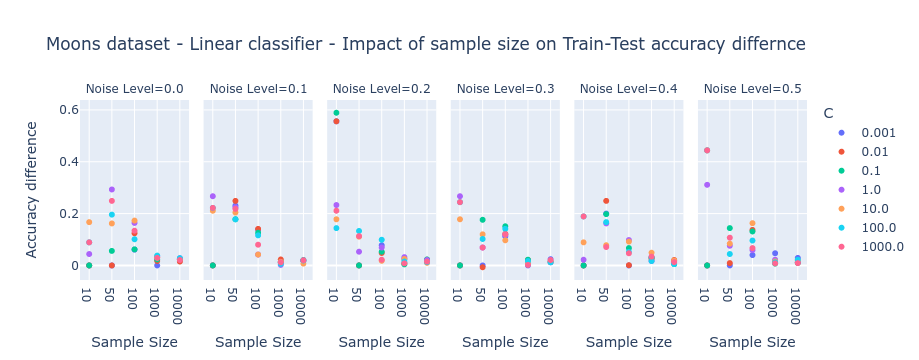

In [142]:
df2_lm.C = df2_lm.C.astype(str)
df2_lm.n_sample = df2_lm.n_sample.astype(str)

fig=px.scatter(df1_lm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='C',hover_data=['n_sample'],facet_col='noise_level',
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce')
fig.show()

In [133]:
df2_lm_stat=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df2_lm_stat

,noise_level,n_sample,mean,std
0,0.0,10,0.055571,0.063311
1,0.0,50,0.136571,0.119082
2,0.0,100,0.117000,0.044907
3,0.0,1000,0.024571,0.012869
4,0.0,10000,0.023000,0.004546
5,0.1,10,0.131714,0.124457
6,0.1,50,0.211714,0.026725
7,0.1,100,0.097857,0.043114
8,0.1,1000,0.011714,0.006601
9,0.1,10000,0.017571,0.004756


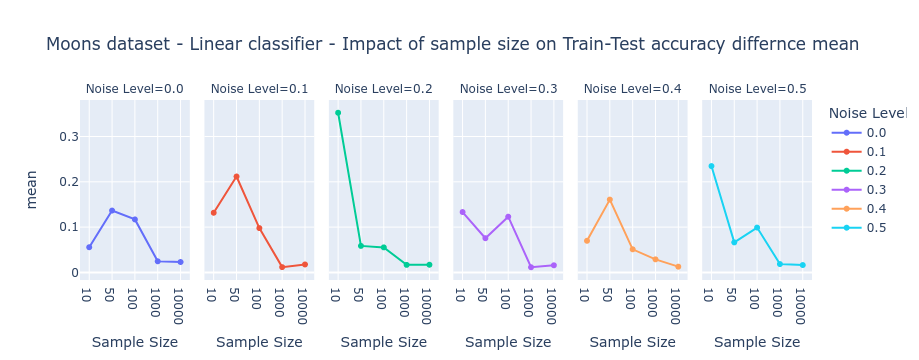

In [141]:
df2_lm_stat.noise_level = df2_lm_stat.noise_level.astype(str)
df2_lm_stat.n_sample = df2_lm_stat.n_sample.astype(str)

fig=px.line(df2_lm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['mean'],facet_col='noise_level',markers=True,
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

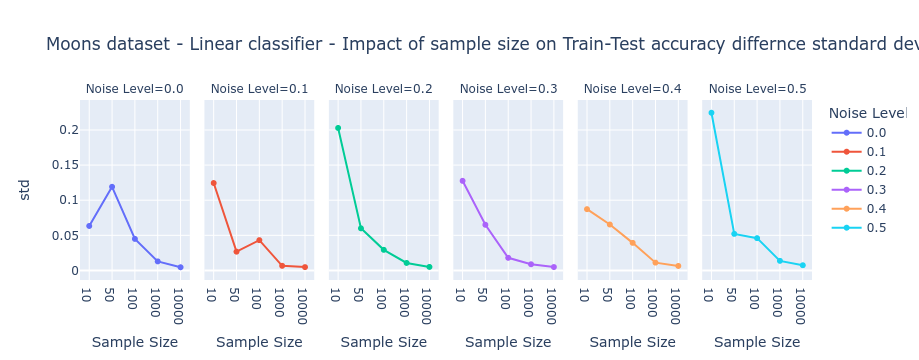

In [140]:
df2_lm_stat.noise_level = df2_lm_stat.noise_level.astype(str)
df2_lm_stat.n_sample = df2_lm_stat.n_sample.astype(str)

fig=px.line(df2_lm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['std'],facet_col='noise_level',markers=True,
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce standard deviation ')
fig.show()

Same results also for the Moons dataset. <b>Train-Test accuracy difference decreases as sample size increases</b> for all noize levels and for all L2 regularization C param.<br>
Also the mean and the standard deviation of Train-Test accuracy difference for different L2 C values,  drops as sample size increase, for all noise levels.

##### SVM Classifier

* Circles dataset

In [173]:
df1_svm=df1.query("clf_type=='svm'").groupby(['noise_level','C','gamma','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df1_svm.sample(10)

,noise_level,C,gamma,n_sample,level_4,acc_diff
258,0.1,0.1,50.000,1000,408,0.020
684,0.3,0.1,100.000,10000,948,0.015
334,0.1,1.0,100.000,10000,472,0.008
1238,0.5,10.0,50.000,1000,1416,0.341
821,0.3,10.0,100.000,50,829,0.500
717,0.3,1.0,0.100,100,857,0.116
533,0.2,1.0,25.000,1000,666,0.052
193,0.0,10.0,100.000,1000,192,0.000
986,0.4,10.0,0.001,50,1065,0.178
866,0.4,0.1,2.000,50,1041,0.133


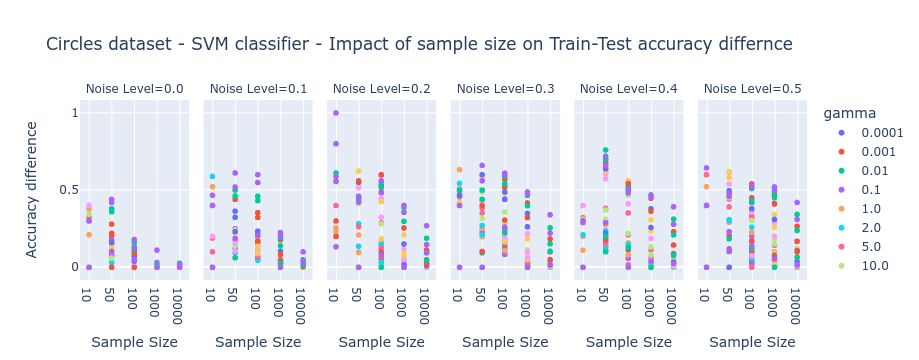

In [175]:
df1_svm.gamma = df1_svm.gamma.astype(str)
df1_svm.n_sample = df1_svm.n_sample.astype(str)

fig=px.scatter(df1_svm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce')
fig.show()

In [168]:
df1_svm_stat=df1.query("clf_type=='svm'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df1_svm_stat

,noise_level,n_sample,mean,std
0,0.0,10,0.163738,0.169438
1,0.0,50,0.111452,0.118363
2,0.0,100,0.071881,0.054184
3,0.0,1000,0.004048,0.017802
4,0.0,10000,0.003476,0.007051
5,0.1,10,0.173024,0.196671
6,0.1,50,0.210524,0.138527
7,0.1,100,0.178500,0.128546
8,0.1,1000,0.042095,0.058705
9,0.1,10000,0.011524,0.017870


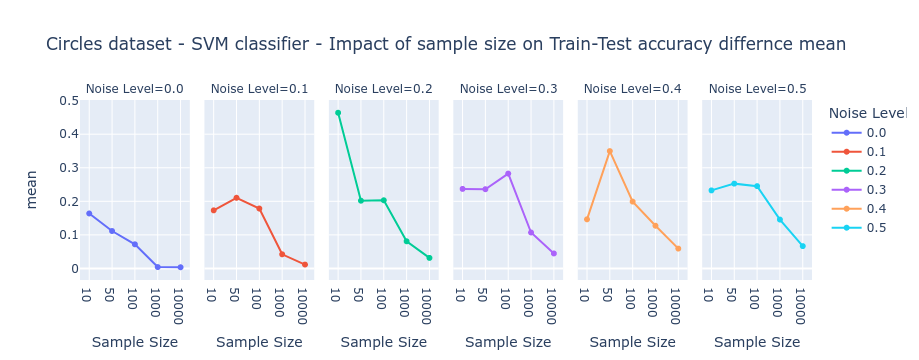

In [183]:
df1_svm_stat.noise_level = df1_svm_stat.noise_level.astype(str)
df1_svm_stat.n_sample = df1_svm_stat.n_sample.astype(str)

fig=px.line(df1_svm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

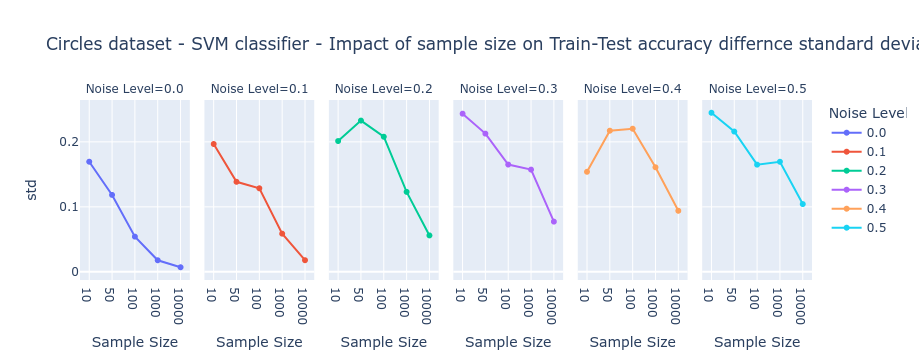

In [186]:
df1_svm_stat.noise_level = df1_svm_stat.noise_level.astype(str)
df1_svm_stat.n_sample = df1_svm_stat.n_sample.astype(str)

fig=px.line(df1_svm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce standard deviation')
fig.show()

* Moons dataset

In [197]:
df2_svm=df2.query("clf_type=='svm'").groupby(['noise_level','C','gamma','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df2_svm.sample(10)

,noise_level,C,gamma,n_sample,level_4,acc_diff
417,0.1,10.0,1000.0,100,1861,0.410
240,0.1,0.1,5.0,10,1728,0.000
886,0.4,0.1,50.0,50,2515,0.249
1236,0.5,10.0,50.0,50,2788,0.500
127,0.0,1.0,250.0,100,1600,0.020
262,0.1,0.1,100.0,100,1830,0.124
1226,0.5,10.0,10.0,50,2786,0.369
551,0.2,1.0,500.0,50,2042,0.380
137,0.0,1.0,1000.0,100,1602,0.160
734,0.3,1.0,5.0,10000,2428,0.001


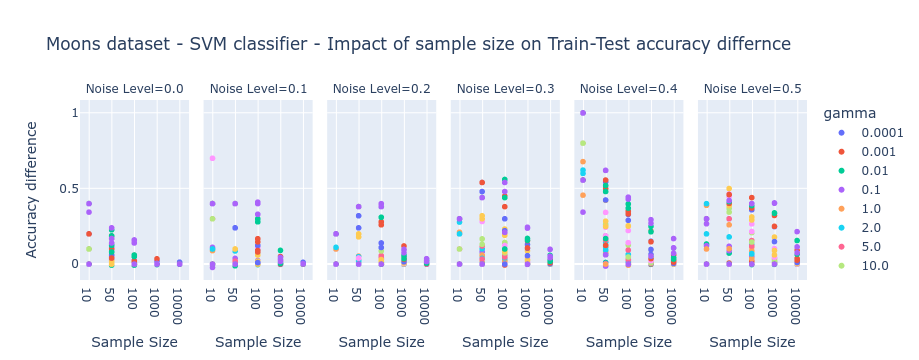

In [198]:
df2_svm.gamma = df2_svm.gamma.astype(str)
df2_svm.n_sample = df2_svm.n_sample.astype(str)

fig=px.scatter(df2_svm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Moons dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce')
fig.show()

In [204]:
df2_svm_stat=df2.query("clf_type=='svm'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df2_svm_stat

,noise_level,n_sample,mean,std
0,0.0,10,0.115333,0.145641
1,0.0,50,0.081690,0.076014
2,0.0,100,0.018238,0.040511
3,0.0,1000,0.002000,0.007019
4,0.0,10000,0.000310,0.002018
5,0.1,10,0.170905,0.211497
6,0.1,50,0.079548,0.143772
7,0.1,100,0.081024,0.116264
8,0.1,1000,0.008429,0.018889
9,0.1,10000,0.000810,0.001903


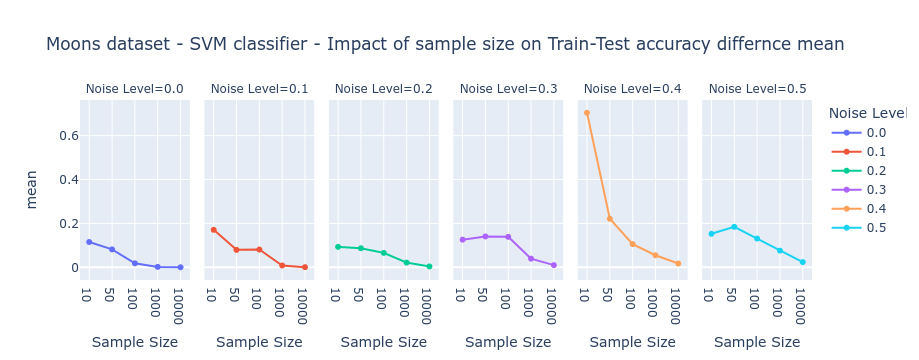

In [201]:
df2_svm_stat.noise_level = df2_svm_stat.noise_level.astype(str)
df2_svm_stat.n_sample = df2_svm_stat.n_sample.astype(str)

fig=px.line(df2_svm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Moons dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

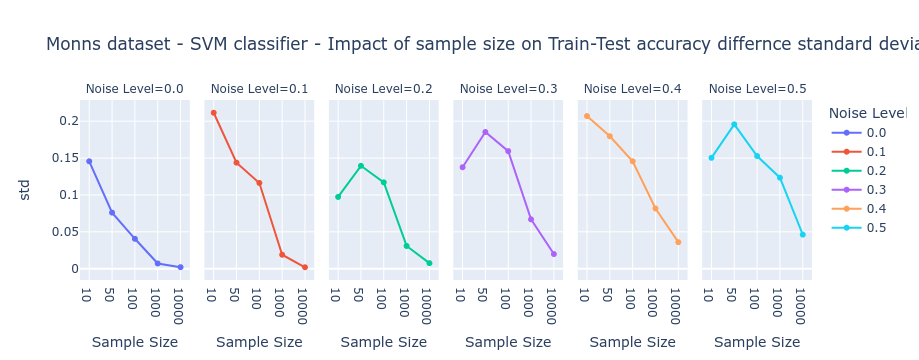

In [202]:
df2_svm_stat.noise_level = df2_svm_stat.noise_level.astype(str)
df2_svm_stat.n_sample = df2_svm_stat.n_sample.astype(str)

fig=px.line(df2_svm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Monns dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce standard deviation')
fig.show()

Similar to the results for the linear model, the Train-Test accuracy difference for SVM classifier decreases as sample size increases for all nosise levels.<br>
In comparison to linear classifier, the Train-Test accuracy difference tends to be higher in SVM at given sample size dou to overfit on the train set - higher predicted accuracy on train set compair to the predicted accuracy on the test set.

Group by results by sample size and noise level and fillter all tests /w max accuracy score on validation set

In [180]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).tail(60)

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                           
10       0.3         223  circles        10          0.3      svm      1.000   
         0.4         280  circles        10          0.4  log_reg      0.600   
                     281  circles        10          0.4  log_reg      0.600   
                     282  circles        10          0.4  log_reg      0.600   
                     287  circles        10          0.4      svm      0.600   
                     288  circles        10          0.4      svm      0.600   
                     289  circles        10          0.4      svm      0.600   
                     292  circles        10          0.4      svm      1.000   
                     293  circles        10          0.4      svm      1.000   
         0.5         350  circles        10          0.5  log_reg      0.600   
                     351  circles        10          0.5  log_reg      0.600   
                     357  circles        10          0.5      svm      0.600   
                     358  circles        10          0.5      svm      0.600   
                     362  circles        10          0.5      svm      1.000   
                     363  circles        10          0.5      svm      1.000   
50       0.0         25   circles        50          0.0      svm      0.967   
         0.1         94   circles        50          0.1      svm      0.800   
                     95   circles        50          0.1      svm      0.931   
         0.2         154  circles        50          0.2  log_reg      0.540   
                     155  circles        50          0.2  log_reg      0.540   
                     162  circles        50          0.2      svm      0.540   
                     163  circles        50          0.2      svm      0.542   
         0.3         224  circles        50          0.3  log_reg      0.620   
                     225  circles        50          0.3  log_reg      0.620   
                     226  circles        50          0.3  log_reg      0.620   
                     231  circles        50          0.3      svm      0.620   
                     232  circles        50          0.3      svm      0.620   
                     233  circles        50          0.3      svm      0.620   
                     234  circles        50          0.3      svm      0.649   
                     236  circles        50          0.3      svm      0.998   
                     237  circles        50          0.3      svm      1.000   
         0.4         299  circles        50          0.4  log_reg      0.627   
         0.5         375  circles        50          0.5      svm      0.913   
100      0.0         38   circles       100          0.0      svm      1.000   
                     39   circles       100          0.0      svm      1.000   
         0.1         109  circles       100          0.1      svm      0.891   
         0.2         179  circles       100          0.2      svm      0.770   
         0.3         241  circles       100          0.3  log_reg      0.574   
                     248  circles       100          0.3      svm      0.676   
         0.4         318  circles       100          0.4      svm      0.659   
         0.5         381  circles       100          0.5  log_reg      0.558   
1000     0.0         52   circles      1000          0.0      svm      1.000   
                     53   circles      1000          0.0      svm      1.000   
                     54   circles      1000          0.0      svm      1.000   
                     55   circles      1000          0.0      svm      1.000   
         0.1         122  circles      1000          0.1      svm      0.816   
         0.2         192  circles      1000          0.2      svm      0.679   
         0.3         262  circles      1000          0.3      svm      0.671   
         0.4         332  

Circles dataset - <br> 
Slightly mix results between the two classifiers (Logistic regression and SVM) for differante sample size and noise level,<br> especially for low sample size test.<br>
Calculate the proporation of prediction success (max predicted Accuracy) for each classifier per samples and noise.<br>
From the results SVM is the winner in the most cases. 

In [179]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).clf_type.groupby(['n_sample','noise_level']).value_counts(normalize=True).rename('clf_prop').to_frame()

clf_prop
n_sample noise_level clf_type          
10       0.0         svm       0.666667
                     log_reg   0.333333
         0.1         svm       1.000000
         0.2         log_reg   0.666667
                     svm       0.333333
         0.3         svm       0.636364
                     log_reg   0.363636
         0.4         svm       0.625000
                     log_reg   0.375000
         0.5         svm       0.666667
                     log_reg   0.333333
50       0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         log_reg   0.500000
                     svm       0.500000
         0.3         svm       0.666667
                     log_reg   0.333333
         0.4         log_reg   1.000000
         0.5         svm       1.000000
100      0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         svm       1.000000
         0.3         log_reg   0.500000
                     svm       0.500000
         0.4         svm       1.000000
         0.5         log_reg   1.000000
1000     0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         svm       1.000000
         0.3         svm       1.000000
         0.4         svm       1.000000
         0.5         svm       1.000000
10000    0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         svm       1.000000
         0.3         svm       1.000000
         0.4         svm       1.000000
         0.5         svm       1.000000

Total proportion between the Classifiers for max success in the whole test.<br>
SVM performs better from the linear model.

In [181]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).clf_type.value_counts(normalize=True)

svm        0.73494
log_reg    0.26506
Name: clf_type, dtype: float64

##### Moons dataset 

Group by results by sample size and noise level and fillter all tests /w max accuracy score on validation set

In [184]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).tail(60)

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                          
10       0.4         701   moons        10          0.4  log_reg      0.700   
                     702   moons        10          0.4  log_reg      0.700   
                     703   moons        10          0.4  log_reg      0.767   
                     704   moons        10          0.4  log_reg      0.922   
                     705   moons        10          0.4  log_reg      0.978   
                     706   moons        10          0.4  log_reg      1.000   
                     707   moons        10          0.4      svm      0.700   
                     708   moons        10          0.4      svm      0.700   
                     709   moons        10          0.4      svm      0.700   
                     710   moons        10          0.4      svm      0.789   
                     711   moons        10          0.4      svm      0.978   
                     712   moons        10          0.4      svm      1.000   
                     713   moons        10          0.4      svm      1.000   
         0.5         773   moons        10          0.5  log_reg      0.911   
                     774   moons        10          0.5  log_reg      0.989   
                     775   moons        10          0.5  log_reg      1.000   
                     780   moons        10          0.5      svm      0.967   
50       0.0         444   moons        50          0.0      svm      1.000   
                     445   moons        50          0.0      svm      1.000   
         0.1         514   moons        50          0.1      svm      1.000   
                     515   moons        50          0.1      svm      1.000   
         0.2         584   moons        50          0.2      svm      0.933   
                     585   moons        50          0.2      svm      0.978   
         0.3         648   moons        50          0.3  log_reg      0.958   
                     654   moons        50          0.3      svm      0.964   
         0.4         720   moons        50          0.4  log_reg      0.784   
                     724   moons        50          0.4      svm      0.831   
         0.5         794   moons        50          0.5      svm      0.793   
100      0.0         458   moons       100          0.0      svm      1.000   
                     459   moons       100          0.0      svm      1.000   
                     460   moons       100          0.0      svm      1.000   
         0.1         528   moons       100          0.1      svm      1.000   
                     529   moons       100          0.1      svm      1.000   
         0.2         598   moons       100          0.2      svm      0.950   
         0.3         668   moons       100          0.3      svm      0.977   
         0.4         731   moons       100          0.4  log_reg      0.801   
                     734   moons       100          0.4  log_reg      0.801   
         0.5         800   moons       100          0.5  log_reg      0.780   
                     804   moons       100          0.5  log_reg      0.787   
1000     0.0         472   moons      1000          0.0      svm      1.000   
                     473   moons      1000          0.0      svm      1.000   
                     474   moons      1000          0.0      svm      1.000   
                     475   moons      1000          0.0      svm      1.000   
         0.1         543   moons      1000          0.1      svm      1.000   
         0.2         613   moons      1000          0.2      svm      0.981   
         0.3         682   moons      1000          0.3      svm      0.915   
         0.4         752   moons      1000          0.4      svm      0.861   
         0.5         822   moons      1000          0.5      svm      0.811   
10000    0.0         485   moons     10000          0.0      svm      1.000

Moons dataset - <br> 
As before, Slightly mix results between the two classifiers (Logistic_reg and SVM) for differante sample size and noize level,<br> especially for low sample size test.<br>
Calculate the proporation of prediction success (max predicted Accuracy) for each classifier per samples and noise.<br>
From the results SVM is the winner in the most cases. 

In [183]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).clf_type.groupby(['n_sample','noise_level']).value_counts(normalize=True).rename('clf_prop').to_frame()

clf_prop
n_sample noise_level clf_type          
10       0.0         log_reg       1.00
         0.1         log_reg       0.75
                     svm           0.25
         0.2         svm           1.00
         0.3         log_reg       1.00
         0.4         log_reg       0.50
                     svm           0.50
         0.5         log_reg       0.75
                     svm           0.25
50       0.0         svm           1.00
         0.1         svm           1.00
         0.2         svm           1.00
         0.3         log_reg       0.50
                     svm           0.50
         0.4         log_reg       0.50
                     svm           0.50
         0.5         svm           1.00
100      0.0         svm           1.00
         0.1         svm           1.00
         0.2         svm           1.00
         0.3         svm           1.00
         0.4         log_reg       1.00
         0.5         log_reg       1.00
1000     0.0         svm           1.00
         0.1         svm           1.00
         0.2         svm           1.00
         0.3         svm           1.00
         0.4         svm           1.00
         0.5         svm           1.00
10000    0.0         svm           1.00
         0.1         svm           1.00
         0.2         svm           1.00
         0.3         svm           1.00
         0.4         svm           1.00
         0.5         svm           1.00

Total proportion between the Classifiers for max success in the whole test.<br>
SVM performs better from the linear model.

In [185]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()]).clf_type.value_counts(normalize=True)

svm        0.671429
log_reg    0.328571
Name: clf_type, dtype: float64

In [200]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).clf_type.groupby(['n_sample','noise_level']).value_counts(normalize=True).rename('clf_prop').to_frame()

clf_prop
n_sample noise_level clf_type          
10       0.0         log_reg   1.000000
         0.1         svm       1.000000
         0.2         log_reg   0.666667
                     svm       0.333333
         0.3         svm       0.636364
                     log_reg   0.363636
         0.4         log_reg   0.538462
                     svm       0.461538
         0.5         log_reg   0.545455
                     svm       0.454545
50       0.0         log_reg   1.000000
         0.1         log_reg   1.000000
         0.2         svm       1.000000
         0.3         svm       1.000000
         0.4         svm       1.000000
         0.5         log_reg   1.000000
100      0.0         svm       1.000000
         0.1         log_reg   1.000000
         0.2         log_reg   1.000000
         0.3         log_reg   1.000000
         0.4         svm       1.000000
         0.5         log_reg   1.000000
1000     0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         log_reg   1.000000
         0.3         svm       1.000000
         0.4         svm       1.000000
         0.5         svm       1.000000
10000    0.0         svm       1.000000
         0.1         svm       1.000000
         0.2         svm       1.000000
         0.3         svm       1.000000
         0.4         svm       1.000000
         0.5         svm       1.000000

#### <b>(2) The most stable classifier</b>

Clasifier and parm w/ the lowest standard deviation on validation test for each dataset and each sample size and noise level

In [204]:
df.loc[df.groupby(['dataset','n_sample','noise_level']).std_valid.idxmin()]

,dataset,n_sample,noise_level,clf_type,acc_train,std_train,CV_train,acc_valid,std_valid,CV_valid,acc_diff,C,gamma
4,circles,10,0.0,log_reg,0.600,0.102,17.0,0.200,0.400,200.0,0.400,10.000,0.000
81,circles,10,0.1,svm,0.911,0.044,4.9,0.700,0.458,65.5,0.211,1.000,10.000
143,circles,10,0.2,log_reg,0.789,0.060,7.6,0.700,0.458,65.5,0.089,1.000,0.000
210,circles,10,0.3,log_reg,0.800,0.044,5.6,0.800,0.400,50.0,0.000,0.001,0.000
280,circles,10,0.4,log_reg,0.600,0.054,9.1,0.600,0.490,81.6,0.000,0.001,0.000
350,circles,10,0.5,log_reg,0.600,0.054,9.1,0.600,0.490,81.6,0.000,0.001,0.000
19,circles,50,0.0,log_reg,0.604,0.043,7.1,0.460,0.128,27.8,0.144,100.000,0.000
85,circles,50,0.1,log_reg,0.560,0.017,3.0,0.560,0.120,21.4,0.000,0.010,0.000
166,circles,50,0.2,svm,0.944,0.018,1.9,0.500,0.100,20.0,0.444,1.000,100.000
236,circles,50,0.3,svm,0.998,0.007,0.7,0.620,0.108,17.4,0.378,1.000,100.000


##### Circels dataset

In [207]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).tail(60)

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                           
10       0.3         223  circles        10          0.3      svm      1.000   
         0.4         280  circles        10          0.4  log_reg      0.600   
                     281  circles        10          0.4  log_reg      0.600   
                     282  circles        10          0.4  log_reg      0.600   
                     283  circles        10          0.4  log_reg      0.656   
                     284  circles        10          0.4  log_reg      0.656   
                     285  circles        10          0.4  log_reg      0.667   
                     286  circles        10          0.4  log_reg      0.678   
                     287  circles        10          0.4      svm      0.600   
                     288  circles        10          0.4      svm      0.600   
                     289  circles        10          0.4      svm      0.600   
                     290  circles        10          0.4      svm      0.756   
                     292  circles        10          0.4      svm      1.000   
                     293  circles        10          0.4      svm      1.000   
         0.5         350  circles        10          0.5  log_reg      0.600   
                     351  circles        10          0.5  log_reg      0.600   
                     353  circles        10          0.5  log_reg      0.767   
                     354  circles        10          0.5  log_reg      0.789   
                     355  circles        10          0.5  log_reg      0.767   
                     356  circles        10          0.5  log_reg      0.767   
                     357  circles        10          0.5      svm      0.600   
                     358  circles        10          0.5      svm      0.600   
                     360  circles        10          0.5      svm      0.800   
                     362  circles        10          0.5      svm      1.000   
                     363  circles        10          0.5      svm      1.000   
50       0.0         19   circles        50          0.0  log_reg      0.604   
         0.1         85   circles        50          0.1  log_reg      0.560   
         0.2         166  circles        50          0.2      svm      0.944   
         0.3         236  circles        50          0.3      svm      0.998   
         0.4         302  circles        50          0.4      svm      0.520   
         0.5         367  circles        50          0.5  log_reg      0.562   
100      0.0         38   circles       100          0.0      svm      1.000   
                     39   circles       100          0.0      svm      1.000   
         0.1         100  circles       100          0.1  log_reg      0.552   
         0.2         172  circles       100          0.2  log_reg      0.548   
         0.3         243  circles       100          0.3  log_reg      0.571   
         0.4         315  circles       100          0.4      svm      0.526   
         0.5         384  circles       100          0.5  log_reg      0.558   
1000     0.0         52   circles      1000          0.0      svm      1.000   
                     53   circles      1000          0.0      svm      1.000   
                     54   circles      1000          0.0      svm      1.000   
                     55   circles      1000          0.0      svm      1.000   
         0.1         123  circles      1000          0.1      svm      0.826   
         0.2         185  circles      1000          0.2  log_reg      0.509   
                     186  circles      1000          0.2  log_reg      0.514   
         0.3         259  circles      1000          0.3      svm      0.506   
         0.4         335  circles      1000          0.4      svm      0.980   
         0.5         399  circles      1000          0.5      svm      0.505   
10000    0.0         65   

In [250]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).clf_type.value_counts(normalize=True)

svm        0.597403
log_reg    0.402597
Name: clf_type, dtype: float64

60% of the result w/ lowest variation from SVM and the rest 40% from Logistic regression

In [253]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).query("clf_type=='log_reg'").acc_valid.mean()

0.5113225806451613

The mean accuracy of Logistic regression w/ the lowest variation results is close to 50%<br>
The linear classifier cannot effectively separate the classes and do it it consistently with the same level of certainty - high bais low variance

In [248]:
df1.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).query("clf_type=='svm'").acc_valid.mean()

0.7061521739130434

The accuracy mean of SVM w/ the lowest variation results is close to 70% <br>
SVM performs w/ better accuracy even at low variance.<br>
The reason for that is the ability of SVM to score accuracy of 100% consistently (zero variance) when the noise level is zero

##### Moons dataset

In [254]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).tail(60)

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                          
10       0.4         701   moons        10          0.4  log_reg      0.700   
                     702   moons        10          0.4  log_reg      0.700   
                     703   moons        10          0.4  log_reg      0.767   
                     704   moons        10          0.4  log_reg      0.922   
                     705   moons        10          0.4  log_reg      0.978   
                     706   moons        10          0.4  log_reg      1.000   
                     707   moons        10          0.4      svm      0.700   
                     708   moons        10          0.4      svm      0.700   
                     709   moons        10          0.4      svm      0.700   
                     710   moons        10          0.4      svm      0.789   
                     711   moons        10          0.4      svm      0.978   
                     712   moons        10          0.4      svm      1.000   
                     713   moons        10          0.4      svm      1.000   
         0.5         770   moons        10          0.5  log_reg      0.556   
                     771   moons        10          0.5  log_reg      0.556   
                     777   moons        10          0.5      svm      0.556   
                     778   moons        10          0.5      svm      0.556   
                     782   moons        10          0.5      svm      1.000   
                     783   moons        10          0.5      svm      1.000   
50       0.0         444   moons        50          0.0      svm      1.000   
                     445   moons        50          0.0      svm      1.000   
         0.1         514   moons        50          0.1      svm      1.000   
                     515   moons        50          0.1      svm      1.000   
         0.2         584   moons        50          0.2      svm      0.933   
         0.3         648   moons        50          0.3  log_reg      0.958   
                     654   moons        50          0.3      svm      0.964   
         0.4         719   moons        50          0.4  log_reg      0.789   
         0.5         792   moons        50          0.5      svm      0.593   
100      0.0         458   moons       100          0.0      svm      1.000   
                     459   moons       100          0.0      svm      1.000   
                     460   moons       100          0.0      svm      1.000   
         0.1         528   moons       100          0.1      svm      1.000   
                     529   moons       100          0.1      svm      1.000   
         0.2         598   moons       100          0.2      svm      0.950   
         0.3         668   moons       100          0.3      svm      0.977   
         0.4         731   moons       100          0.4  log_reg      0.801   
         0.5         806   moons       100          0.5      svm      0.771   
1000     0.0         472   moons      1000          0.0      svm      1.000   
                     473   moons      1000          0.0      svm      1.000   
                     474   moons      1000          0.0      svm      1.000   
                     475   moons      1000          0.0      svm      1.000   
         0.1         543   moons      1000          0.1      svm      1.000   
         0.2         614   moons      1000          0.2      svm      0.988   
         0.3         680   moons      1000          0.3      svm      0.848   
         0.4         743   moons      1000          0.4  log_reg      0.816   
         0.5         815   moons      1000          0.5  log_reg      0.793   
10000    0.0         485   moons     10000          0.0      svm      1.000   
                     486   moons     10000          0.0      svm      1.000   
                     487   moons     10000          0.0      svm      1.000

In [259]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).clf_type.value_counts(normalize=True)

svm        0.671429
log_reg    0.328571
Name: clf_type, dtype: float64

67% of the result w/ lowest variation from SVM and the rest 33% from Logistic regression

In [261]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).query("clf_type=='log_reg'").acc_valid.mean()

0.7337391304347827

The mean accuracy of Logistic regression w/ the lowest variation results is 73%<br>
The linear classifier does a better separation on the moons dataset vs. on the circles dataset w/ same level of certainty.

In [262]:
df2.groupby(['n_sample','noise_level']).apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()]).query("clf_type=='svm'").acc_valid.mean()

0.8362978723404256

The accuracy mean of SVM w/ the lowest variation results is close to 84% <br>
SVM performs w/ better then the linear classifier accuracy even at low variance.<br>
On average, SVM perform better on the moons dataset.


#### <b>(3) Regularization (C) and linear classifier</b>

##### Circle dataset

In [39]:
df1.query("clf_type=='log_reg'").groupby(['n_sample','noise_level','C']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
n_sample noise_level C                      
10       0.0         0.001    0        0.600
                     0.010    1        0.600
                     0.100    2        0.600
                     1.000    3        0.300
                     10.000   4        0.200
...                                      ...
10000    0.5         0.100    408      0.502
                     1.000    409      0.503
                     10.000   410      0.504
                     100.000  411      0.502
                     1000.000 412      0.501

[210 rows x 1 columns]

The linear classifier can not effectively separate the classes /w accuracy above 50% im most casees.<br>
The regularization parameter C has a negligible effect on the level of accuracy.

##### Moons dataset

In [40]:
df2.query("clf_type=='log_reg'").groupby(['n_sample','noise_level','C']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
n_sample noise_level C                      
10       0.0         0.001    420      0.700
                     0.010    421      0.700
                     0.100    422      0.700
                     1.000    423      0.700
                     10.000   424      0.800
...                                      ...
10000    0.5         0.100    828      0.808
                     1.000    829      0.808
                     10.000   830      0.808
                     100.000  831      0.808
                     1000.000 832      0.808

[210 rows x 1 columns]

The linear classifier performs very good on the moon dateset - seperate the classes /w accuracy up to 90%.<br>
Now the regularization parameter C has significant impact on the level of accuracy<br>
As C parm increases, the level of accuracy increases (more fit), mainly for low noise levels.

#### <b>(4) Impact of sample size on prediction accuracy on train and validation sets</b>

##### Circle dataset

prediction accuracy on the <span style="color:red"><b>Train</b></span> set as function of noise level and sample size

Linear clasifier

In [183]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level C        n_sample               
0.0         0.001    10       0        0.600
                     50       14       0.620
                     100      28       0.540
                     1000     42       0.522
                     10000    56       0.499
...                                      ...
0.5         1000.000 10       356      0.767
                     50       370      0.562
                     100      384      0.558
                     1000     398      0.529
                     10000    412      0.507

[210 rows x 1 columns]

As the sample size increases, and for all noise levels, the <b>predicted accuracy on the train set decreases</b><br> (converge to the level of 50%)

SVM classifier

In [186]:
df1.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level gamma    n_sample               
0.0         0.001    10       7        0.600
                     50       21       0.620
                     100      35       0.540
                     1000     49       0.522
                     10000    63       0.502
...                                      ...
0.5         1000.000 10       363      1.000
                     50       377      0.996
                     100      391      1.000
                     1000     405      0.988
                     10000    419      0.835

[210 rows x 1 columns]

As the sample size increases, and for all noise levels, the <b>predicted accuracy on the train set decreases</b>

prediction accuracy on the <span style="color:red"><b>Validation</b></span> set as function of noise level and sample size

Linear classifier

In [192]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level C        n_sample               
0.0         0.001    10       0        0.600
                     50       14       0.620
                     100      28       0.540
                     1000     42       0.522
                     10000    56       0.476
...                                      ...
0.5         1000.000 10       356      0.400
                     50       370      0.480
                     100      384      0.480
                     1000     398      0.519
                     10000    412      0.501

[210 rows x 1 columns]

Mixed results between noise levels. in general as the sample size increases, <b>the predicted accuracy increases</b> and converge to the level of 50%<br>

SVM classifier

In [220]:
df1.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level gamma    n_sample               
0.0         0.001    10       7        0.600
                     50       21       0.620
                     100      35       0.540
                     1000     49       0.522
                     10000    63       0.491
...                                      ...
0.5         1000.000 10       363      0.600
                     50       377      0.540
                     100      391      0.470
                     1000     405      0.531
                     10000    419      0.518

[210 rows x 1 columns]

Mixed results for noise levels and hyper parms. With sample size increases, the predicted accuracy on the validation increases and also decreases.

<span style="color:red"><b>Accuracy difference</b></span> (Train - Validation)

Linear classifier

In [244]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level C        n_sample              
0.0         0.001    10       0       0.000
                     50       14      0.000
                     100      28      0.000
                     1000     42      0.000
                     10000    56      0.023
...                                     ...
0.5         1000.000 10       356     0.367
                     50       370     0.082
                     100      384     0.078
                     1000     398     0.010
                     10000    412     0.006

[210 rows x 1 columns]

The more sample size increases the <b>accuracy differnce decreases</b>

SVM classifier

In [250]:
df1.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level gamma    n_sample              
0.0         0.001    10       7       0.000
                     50       21      0.000
                     100      35      0.000
                     1000     49      0.000
                     10000    63      0.011
...                                     ...
0.5         1000.000 10       363     0.400
                     50       377     0.456
                     100      391     0.530
                     1000     405     0.457
                     10000    419     0.317

[210 rows x 1 columns]

The more sample size increases the <b>accuracy differnce decreases</b>

##### Moons dataset

prediction accuracy on the <span style="color:red"><b>Train</b></span> set as function of noise level and sample size

Linear classifier

In [225]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level C        n_sample               
0.0         0.001    10       420      0.700
                     50       434      0.540
                     100      448      0.540
                     1000     462      0.799
                     10000    476      0.825
...                                      ...
0.5         1000.000 10       776      1.000
                     50       790      0.756
                     100      804      0.787
                     1000     818      0.792
                     10000    832      0.808

[210 rows x 1 columns]

Mixed results between noise levels and regularization parms. With sample size increases, the predicted accuracy on the train increases and sometimes decreases.

SVM classifier

In [224]:
df2.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level gamma    n_sample               
0.0         0.001    10       427      0.700
                     50       441      0.544
                     100      455      0.540
                     1000     469      0.813
                     10000    483      0.860
...                                      ...
0.5         1000.000 10       783      1.000
                     50       797      0.984
                     100      811      0.992
                     1000     825      0.986
                     10000    839      0.898

[210 rows x 1 columns]

In general, as the sample size increases, and for all noise levels, the <b>predicted accuracy on the train set increases</b> <br>
The more samples there are, the better the SVM classifier learns.

prediction accuracy on the <span style="color:red"><b>Validation</b></span> set as function of noise level and sample size

Linear classifier

In [231]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level C        n_sample               
0.0         0.001    10       420      0.700
                     50       434      0.340
                     100      448      0.540
                     1000     462      0.794
                     10000    476      0.825
...                                      ...
0.5         1000.000 10       776      0.700
                     50       790      0.740
                     100      804      0.790
                     1000     818      0.791
                     10000    832      0.808

[210 rows x 1 columns]

In general, as the sample size increases, and for all noise levels, the <b>predicted accuracy on the validation set increases</b> <br>
The more samples there are, the better the Linear classifier separate the classes on the validation set.

SVM classifier

In [235]:
df2.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level gamma    n_sample               
0.0         0.001    10       427      0.700
                     50       441      0.540
                     100      455      0.540
                     1000     469      0.814
                     10000    483      0.860
...                                      ...
0.5         1000.000 10       783      0.000
                     50       797      0.440
                     100      811      0.420
                     1000     825      0.609
                     10000    839      0.774

[210 rows x 1 columns]

As the sample size increases, and for all noise levels, the <b>predicted accuracy on the validation set increases</b> <br>
The more samples there are, the better the SVM classifier predict on th e validation set.

<span style="color:red"><b>Accuracy difference</b></span> (Train - Validation)

Linear classifier

In [254]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level C        n_sample              
0.0         0.001    10       420     0.000
                     50       434     0.200
                     100      448     0.000
                     1000     462     0.005
                     10000    476     0.000
...                                     ...
0.5         1000.000 10       776     0.300
                     50       790     0.016
                     100      804    -0.003
                     1000     818     0.001
                     10000    832     0.000

[210 rows x 1 columns]

The more sample size increases the <b>accuracy differnce decreases</b>

SVM classifier

In [258]:
df2.query("clf_type=='svm'").groupby(['noise_level','gamma','n_sample']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level gamma    n_sample              
0.0         0.001    10       427     0.000
                     50       441     0.004
                     100      455     0.000
                     1000     469    -0.001
                     10000    483     0.000
...                                     ...
0.5         1000.000 10       783     1.000
                     50       797     0.544
                     100      811     0.572
                     1000     825     0.377
                     10000    839     0.124

[210 rows x 1 columns]

The more sample size increases the <b>accuracy differnce decreases</b>

#### <b>(5) Impact of model complexity on prediction accuracy on train and validation sets</b>

##### Circle dataset

Prediction accuracy on the <span style="color:red"><b>Train</b></span> set as function model complexity per noise level and sample size

Linear classifier

In [266]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level n_sample C                      
0.0         10       0.001    0        0.600
                     0.010    1        0.600
                     0.100    2        0.600
                     1.000    3        0.633
                     10.000   4        0.600
...                                      ...
0.5         10000    0.100    408      0.506
                     1.000    409      0.508
                     10.000   410      0.510
                     100.000  411      0.507
                     1000.000 412      0.507

[210 rows x 1 columns]

With higher l2 regularization value C (higher model complexity) the predicted <b>accuracy on train set increases</b> for each noise level and sample size

SVM classifier

In [269]:
df1.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level n_sample gamma                  
0.0         10       0.001    7        0.600
                     0.010    8        0.600
                     0.100    9        0.600
                     1.000    10       0.656
                     10.000   11       0.922
...                                      ...
0.5         10000    0.100    415      0.566
                     1.000    416      0.571
                     10.000   417      0.580
                     100.000  418      0.661
                     1000.000 419      0.835

[210 rows x 1 columns]

With higher gamma for SVM (higher model complexity) the predicted <b>accuracy on train set increases</b> for each noise level and sample size

Prediction accuracy on the <span style="color:red"><b>Validation</b></span> set as function model complexity per noise level and sample size

Linear classifier

In [281]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level n_sample C                      
0.0         10       0.001    0        0.600
                     0.010    1        0.600
                     0.100    2        0.600
                     1.000    3        0.300
                     10.000   4        0.200
...                                      ...
0.5         10000    0.100    408      0.502
                     1.000    409      0.503
                     10.000   410      0.504
                     100.000  411      0.502
                     1000.000 412      0.501

[210 rows x 1 columns]

With higher l2 regularization value C (higher model complexity) the predicted <b>accuracy on validation set tends to decrease</b> or remains the same at best for each noise level and sample size

SVM classifier

In [282]:
df1.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level n_sample gamma                  
0.0         10       0.001    7        0.600
                     0.010    8        0.600
                     0.100    9        0.600
                     1.000    10       0.400
                     10.000   11       0.600
...                                      ...
0.5         10000    0.100    415      0.565
                     1.000    416      0.570
                     10.000   417      0.562
                     100.000  418      0.548
                     1000.000 419      0.518

[210 rows x 1 columns]

The predicted <b>accuracy on the validation</b> set tends to <b>increase</b> w/ higher gamma values (higher complexity) up to a certain<br> <b>maximum</b> point and then the accuracy <b>decreases</b> as gamma keep increases - <b>indication to over fit</b>.

<span style="color:red"><b>Accuracy difference</b></span> (Train - Validation)

Linear classifier

In [287]:
df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level n_sample C                     
0.0         10       0.001    0       0.000
                     0.010    1       0.000
                     0.100    2       0.000
                     1.000    3       0.333
                     10.000   4       0.400
...                                     ...
0.5         10000    0.100    408     0.004
                     1.000    409     0.005
                     10.000   410     0.006
                     100.000  411     0.005
                     1000.000 412     0.006

[210 rows x 1 columns]

With higher l2 regularization value C (higher model complexity) the predicted <b>accuracy difference</b> between the train set and the validation set tends to <b>increase</b> for each noise level and sample size

SVM classifier

In [291]:
df1.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level n_sample gamma                 
0.0         10       0.001    7       0.000
                     0.010    8       0.000
                     0.100    9       0.000
                     1.000    10      0.256
                     10.000   11      0.322
...                                     ...
0.5         10000    0.100    415     0.001
                     1.000    416     0.001
                     10.000   417     0.018
                     100.000  418     0.113
                     1000.000 419     0.317

[210 rows x 1 columns]

The SVM classifier <b>accuracy difference</b> on the train set vs the validation set tends to get a <b>minimum</b> point at certain gamma level and when gamma keeps to increase (higher complexity) the accuracy differennce starts to <b>increases</b> - <b>indication to select best hyper params</b>.

##### Moons dataset

Linear classifier

Prediction accuracy on the <span style="color:red"><b>Train</b></span> set as function model complexity per noise level and sample size

In [14]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level n_sample C                      
0.0         10       0.001    420      0.700
                     0.010    421      0.700
                     0.100    422      0.700
                     1.000    423      0.778
                     10.000   424      0.978
...                                      ...
0.5         10000    0.100    828      0.808
                     1.000    829      0.808
                     10.000   830      0.808
                     100.000  831      0.808
                     1000.000 832      0.808

[210 rows x 1 columns]

With higher l2 regularization value C (higher model complexity) the predicted <b>accuracy on train set increases</b> for each noise level and sample size

SVM classifier

In [17]:
df2.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_train).to_frame()

acc_train
noise_level n_sample gamma                  
0.0         10       0.001    427      0.700
                     0.010    428      0.700
                     0.100    429      0.700
                     1.000    430      0.978
                     10.000   431      1.000
...                                      ...
0.5         10000    0.100    835      0.817
                     1.000    836      0.823
                     10.000   837      0.826
                     100.000  838      0.835
                     1000.000 839      0.898

[210 rows x 1 columns]

With higher gamma for SVM (higher model complexity) the predicted <b>accuracy on train set increases</b> for each noise level and sample size

Prediction accuracy on the <span style="color:red"><b>Validation</b></span> set as function model complexity per noise level and sample size

Linear classifier

In [26]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level n_sample C                      
0.0         10       0.001    420      0.700
                     0.010    421      0.700
                     0.100    422      0.700
                     1.000    423      0.700
                     10.000   424      0.800
...                                      ...
0.5         10000    0.100    828      0.808
                     1.000    829      0.808
                     10.000   830      0.808
                     100.000  831      0.808
                     1000.000 832      0.808

[210 rows x 1 columns]

The predicted <b>accuracy on the validation</b> set tends to <b>increase</b> w/ higher l2 regularization value C values (higher complexity)<br> up to certain <b>maximum</b> point and then the accuracy remains the same more or less

SVM classifier

In [29]:
df2.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_valid).to_frame()

acc_valid
noise_level n_sample gamma                  
0.0         10       0.001    427      0.700
                     0.010    428      0.700
                     0.100    429      0.700
                     1.000    430      0.700
                     10.000   431      0.700
...                                      ...
0.5         10000    0.100    835      0.817
                     1.000    836      0.822
                     10.000   837      0.823
                     100.000  838      0.816
                     1000.000 839      0.774

[210 rows x 1 columns]

The predicted <b>accuracy on the validation</b> set tends to <b>increase</b> w/ higher gamma values (higher complexity) up to a certain<br> <b>maximum</b> point and then the accuracy <b>decreases</b> as gamma keep increases - <b>indication to over fit</b>.

<span style="color:red"><b>Accuracy difference</b></span> (Train - Validation)

Linear classifier

In [33]:
df2.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level C        n_sample              
0.0         0.001    10       420     0.000
                     50       434     0.200
                     100      448     0.000
                     1000     462     0.005
                     10000    476     0.000
...                                     ...
0.5         1000.000 10       776     0.300
                     50       790     0.016
                     100      804    -0.003
                     1000     818     0.001
                     10000    832     0.000

[210 rows x 1 columns]

With higher l2 regularization value C (higher model complexity) the predicted <b>accuracy difference</b> between the train set and the validation set tends to <b>decrease to zero</b> for each noise level and sample size

SVM classifier

In [36]:
df2.query("clf_type=='svm'").groupby(['noise_level','n_sample','gamma']).apply(lambda grp: grp.acc_diff).to_frame()

acc_diff
noise_level n_sample gamma                 
0.0         10       0.001    427     0.000
                     0.010    428     0.000
                     0.100    429     0.000
                     1.000    430     0.278
                     10.000   431     0.300
...                                     ...
0.5         10000    0.100    835     0.000
                     1.000    836     0.001
                     10.000   837     0.003
                     100.000  838     0.019
                     1000.000 839     0.124

[210 rows x 1 columns]

The SVM classifier <b>accuracy difference</b> on the train set vs the validation set tends to get a <b>minimum</b> point at certain gamma level and when gamma keeps to increase (higher complexity) the accuracy differennce starts to <b>increases</b> - <b>indication to select best hyper params</b>.

#### <b>(6) Noise level effect on the sample size needed to reach maximum predicted acuuracy on validation set</b>

In [76]:
df1.query("clf_type=='svm'").groupby(['gamma','noise_level']).apply(lambda grp: grp.loc[grp.acc_valid.idxmax()]['n_sample']).to_frame().tail(60)

0
gamma    noise_level       
0.001    0.0             50
         0.1             10
         0.2             10
         0.3             10
         0.4             10
         0.5             10
0.010    0.0             50
         0.1             10
         0.2             10
         0.3             10
         0.4             10
         0.5             10
0.100    0.0          10000
         0.1          10000
         0.2          10000
         0.3             10
         0.4             10
         0.5          10000
1.000    0.0            100
         0.1          10000
         0.2             10
         0.3             10
         0.4          10000
         0.5           1000
10.000   0.0            100
         0.1          10000
         0.2          10000
         0.3             10
         0.4          10000
         0.5             50
100.000  0.0           1000
         0.1          10000
         0.2          10000
         0.3             10
         0.4             10
         0.5             10
1000.000 0.0           1000
         0.1          10000
         0.2          10000
         0.3             10
         0.4             10
         0.5             10

In [ ]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = <'Your hyper parameters ranges here'>
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [ ]:
slope, intercept = 2.5, 6

In [ ]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [ ]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

In [ ]:
px.scatter(data, x='x', y='y', color = 'label')